<a href="https://colab.research.google.com/github/pdpranavkumar/lecture1/blob/master/Bias_Variance_Trade_off_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import array as ay

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange','royalblue','darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTSIZE = 12
N_OBSERVATION = 10
NOISE_STD = 1

x = 2 * (np.random.rand(N_OBSERVATION) - .5)
x_grid = np.linspace(-1, 1, 100 )

def f(x):
  """"base function"""
  return np.sin(x * np.pi)

def sample_fx_data(shape, noise_std=NOISE_STD):
   return f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
  """plot f(x) and noisy samples"""
  y = y if y is not None else sample_fx_data(x.shape)
  fig, axs = plt.subplots(figsize=(6,6))
  plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)') 
  plt.scatter(x, y, s=MARKER_SIZE,edgecolors=DATA_COLOR, facecolors='none', label='y')







#plot the data

(-2.0, 2.0)

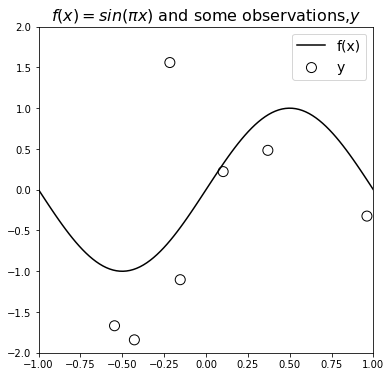

In [3]:
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations,$y$', fontsize=16)
plt.xlim([-1,1])
plt.ylim([-2, 2])

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
x

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496])

In [6]:
y

array([ 2.20990384, -1.84107056, -1.66832743,  0.22215401,  2.4730462 ,
       -1.10346083, -0.32341389,  0.48297796,  2.0864081 ,  1.55966971])

Text(0.5, 1.0, 'Various polynomial function fit to observations')

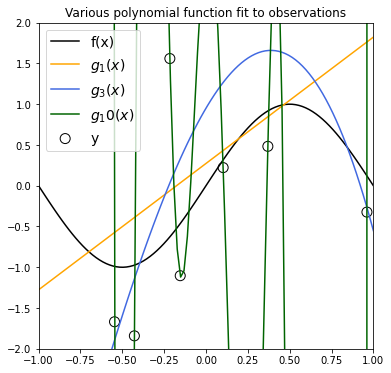

In [9]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 10]
theta = {}
fit ={}
for ii,degree in enumerate(polynomial_degrees):
  #note: we should get an overconditioning warning for degree 10 because of extreme overfitting
  theta[degree] = np.polyfit(x,y,degree)
  fit[degree] = np.polyval(theta[degree],x_grid)
  # plt.figure(figsize=(10,10))
  plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii],label=f"$g_{degree}(x)$")

plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1,1])  
plt.ylim([-2,2])
plt.title("Various polynomial function fit to observations")

In [10]:
fit

{1: array([-1.2767972 , -1.24549209, -1.21418698, -1.18288187, -1.15157676,
        -1.12027165, -1.08896653, -1.05766142, -1.02635631, -0.9950512 ,
        -0.96374609, -0.93244098, -0.90113587, -0.86983075, -0.83852564,
        -0.80722053, -0.77591542, -0.74461031, -0.7133052 , -0.68200009,
        -0.65069498, -0.61938986, -0.58808475, -0.55677964, -0.52547453,
        -0.49416942, -0.46286431, -0.4315592 , -0.40025408, -0.36894897,
        -0.33764386, -0.30633875, -0.27503364, -0.24372853, -0.21242342,
        -0.1811183 , -0.14981319, -0.11850808, -0.08720297, -0.05589786,
        -0.02459275,  0.00671236,  0.03801748,  0.06932259,  0.1006277 ,
         0.13193281,  0.16323792,  0.19454303,  0.22584814,  0.25715325,
         0.28845837,  0.31976348,  0.35106859,  0.3823737 ,  0.41367881,
         0.44498392,  0.47628903,  0.50759415,  0.53889926,  0.57020437,
         0.60150948,  0.63281459,  0.6641197 ,  0.69542481,  0.72672993,
         0.75803504,  0.78934015,  0.82064526,  

**BIAS AND VARIANCE OF AN ESTIMATOR**




Text(0.5, 0.98, 'Model Fits Given Random Samples Around f(x)')

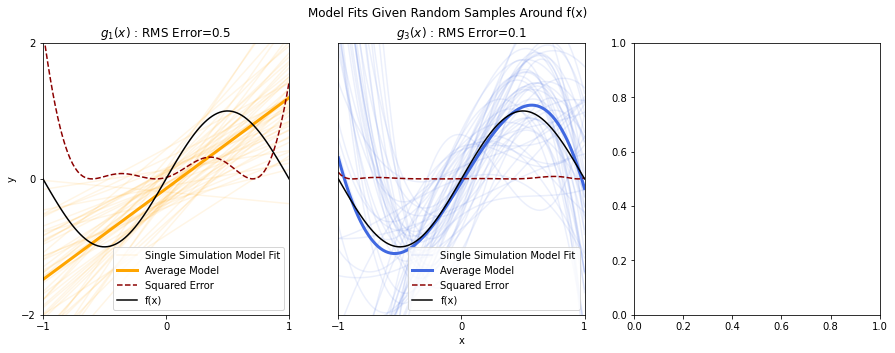

In [11]:
 from collections import defaultdict

n_simulations = 50
simulation_fits = defaultdict(list)
for sim in range(n_simulations):
    # Start from same samples
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees[:-1]:
        # Note: we should get an overconditioned warning
        # for degree 10 because of extreme overfitting
        theta_tmp = np.polyfit(x, y_simulation, degree)
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))


def error_function(pred, actual):
    return (pred - actual) ** 2


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ii, degree in enumerate(polynomial_degrees[:-1]):
    plt.sca(axs[ii])
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)

    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid)) 
    rms = np.sqrt(np.mean(squared_error))
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
    plt.yticks([])
    if ii == 1:
        plt.xlabel('x')
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])
    plt.title(f"$g_{degree}(x)$ : RMS Error={np.round(rms, 1)}")
    plt.legend(loc='lower right')
plt.suptitle('Model Fits Given Random Samples Around f(x)')

#We then calculate and display the squared bias, variance, and prediction error on testing set for each of the estimators:

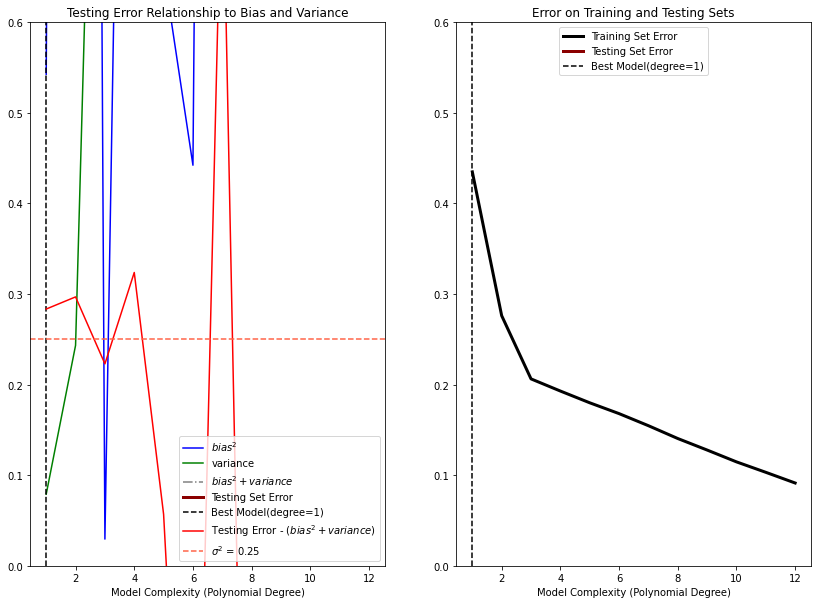

In [13]:
np.random.seed(124)
n_observations_per_dataset = 25
n_datasets = 100
max_poly_degree = 12 
# maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .5
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
# x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(x_train.shape[0])
    y_test = f(x_test) + NOISE_STD * np.random.randn(x_test.shape[0])

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^{2}$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^{2} + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^{2} + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^{2}$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')



In [15]:
pred_test[1]

[array([0.86934014, 0.96787724, 1.06641434, 1.16495144, 1.26348855]),
 array([1.14032367, 1.2584963 , 1.37666893, 1.49484156, 1.61301419]),
 array([0.78574974, 0.86634159, 0.94693345, 1.0275253 , 1.10811716]),
 array([1.55418034, 1.68608445, 1.81798857, 1.94989268, 2.0817968 ]),
 array([1.02098624, 1.13359459, 1.24620294, 1.35881129, 1.47141963]),
 array([0.89599676, 0.99190208, 1.08780741, 1.18371273, 1.27961805]),
 array([0.74310792, 0.82116225, 0.89921658, 0.97727091, 1.05532524]),
 array([1.06887297, 1.17800912, 1.28714528, 1.39628143, 1.50541758]),
 array([0.74633685, 0.83426189, 0.92218693, 1.01011197, 1.09803701]),
 array([1.23758271, 1.35148027, 1.46537782, 1.57927537, 1.69317293]),
 array([1.40780525, 1.54609199, 1.68437872, 1.82266545, 1.96095219]),
 array([0.65424476, 0.7256938 , 0.79714283, 0.86859187, 0.94004091]),
 array([0.78501513, 0.86886902, 0.95272291, 1.0365768 , 1.12043069]),
 array([0.76250547, 0.8530594 , 0.94361332, 1.03416724, 1.12472116]),
 array([0.78135038, 